# Quickstart guide

<a href="https://colab.research.google.com/github/rheopy/rheofit/blob/master/notebooks/Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install git+https://github.com/marcocaggioni/rheofit.git

In [0]:
import rheofit
import numpy as np
import pandas as pd
import pybroom as pb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

Creating a few test datasets.

In real life you will need to import the data from a csv or excel file. Pandas is a good choice to do that. 

Here we are generating artificial data and making two colums dataframes. 

The two colums are 'Shear rate' from 0.001 1/s to 1000 1/s and stress calculated with different yield stress fluid models. 

I also stick a label as a property to the dataframe to carry with me information about which sample the data belong to. I could add a third column with the label, in a tidy way, but I cannot yet convince myself it is better.

In [17]:
test_data_bingham=pd.DataFrame.from_dict({'Shear rate':np.logspace(-3,3),'Stress':rheofit.models.Bingham(np.logspace(-3,3),ystress=1,eta_bg=0.1)})
test_data_bingham.label='test_data_bingham'

test_data_HB=pd.DataFrame.from_dict({'Shear rate':np.logspace(-3,3),'Stress':rheofit.models.HB(np.logspace(-3,3),ystress=1,K=1,n=0.6)})
test_data_HB.label='test_data_HB'

test_data_casson=pd.DataFrame.from_dict({'Shear rate':np.logspace(-3,3),'Stress':rheofit.models.casson(np.logspace(-3,3),ystress=1,eta_bg=0.1)})
test_data_casson.label='test_data_casson'

display(test_data_bingham.head())

,Shear rate,Stress
0,0.001000,1.000100
1,0.001326,1.000133
2,0.001758,1.000176
3,0.002330,1.000233
4,0.003089,1.000309


In [0]:
#I make a list with all my data
data_list=[test_data_bingham,test_data_casson,test_data_HB]

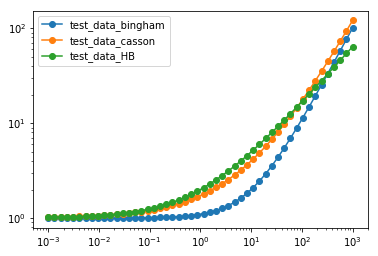

In [28]:
# I can look at my data
for data in data_list:
  plt.loglog('Shear rate','Stress',data=data,marker='o',label=data.label)
  plt.legend()

In [0]:
#I select a model
model=rheofit.models.HB_model
#I make a list of fit_result
res_fit_dict={data.label:model.fit(data['Stress'],x=data['Shear rate']) for data in data_list}

In [36]:
pb.glance(res_fit_dict)

,model,method,num_params,num_data_points,chisqr,redchi,AIC,BIC,num_func_eval,success,message,key
0,"Model(HB, prefix='HB_')",leastsq,3,50,1.616277e-27,3.438888e-29,-3274.084746,-3268.348677,25,True,Fit succeeded.,test_data_HB
1,"Model(HB, prefix='HB_')",leastsq,3,50,9.800971e-26,2.085313e-27,-3068.837700,-3063.101631,131,True,Fit succeeded.,test_data_bingham
2,"Model(HB, prefix='HB_')",leastsq,3,50,8.055381e+00,1.713911e-01,-85.284137,-79.548068,47,True,Fit succeeded.,test_data_casson


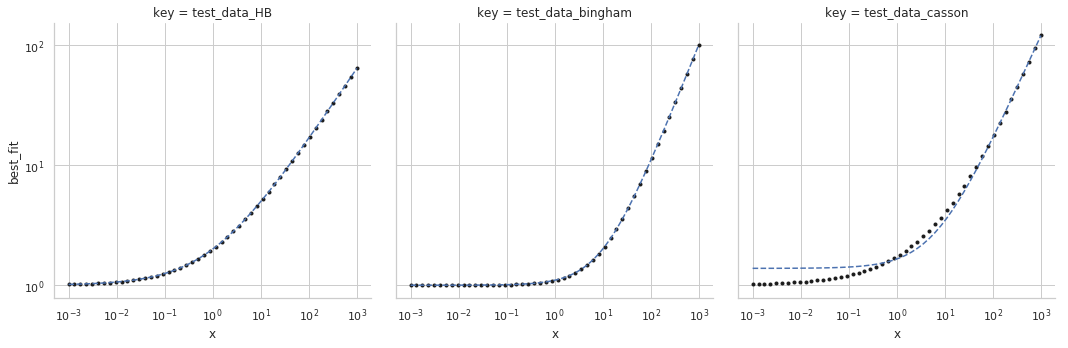

In [94]:
augmented_table = pb.augment(res_fit_dict)
grid = sns.FacetGrid(augmented_table, col="key", col_wrap=3,height=5)
grid.map(plt.plot, 'x', 'data', marker='o', ls='None', ms=3, color='k').set(yscale = 'log').set(xscale = 'log')
grid.map(plt.plot, 'x', 'best_fit', ls='--')


In [0]:
# or I can try different models
res_fit_dict_HB={data.label:rheofit.models.HB_model.fit(data['Stress'],x=data['Shear rate']) for data in data_list}
res_fit_dict_casson={data.label:rheofit.models.casson_model.fit(data['Stress'],x=data['Shear rate']) for data in data_list}
res_fit_dict_bingham={data.label:rheofit.models.Bingham_model.fit(data['Stress'],x=data['Shear rate']) for data in data_list}

augmented_table_HB=pb.augment(res_fit_dict_HB)
augmented_table_HB['model']='HB'
augmented_table_casson=pb.augment(res_fit_dict_casson)
augmented_table_casson['model']='casson'
augmented_table_bingham=pb.augment(res_fit_dict_bingham)
augmented_table_bingham['model']='bingham'

augmented_table_full=pd.concat([augmented_table_HB,augmented_table_casson,augmented_table_bingham],sort=False)

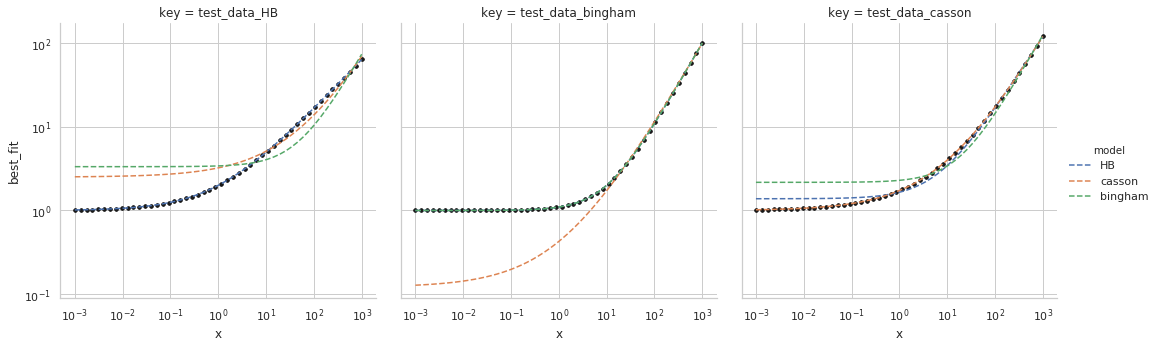

In [84]:
grid = sns.FacetGrid(augmented_table_full, col="key", hue='model', col_wrap=3,height=5)
grid.map(plt.plot, 'x', 'data', marker='o', ls='None', ms=3, color='k').set(yscale = 'log').set(xscale = 'log')
grid.map(plt.plot, 'x', 'best_fit', ls='--').add_legend()

In [0]:
#I may want to try to pass weight to the fit since I prefer to minimize the relative deviation from the data
res_fit_dict_HB={data.label:rheofit.models.HB_model.fit(data['Stress'],x=data['Shear rate'],weights=1/data['Stress']) for data in data_list}
res_fit_dict_casson={data.label:rheofit.models.casson_model.fit(data['Stress'],x=data['Shear rate'],weights=1/data['Stress']) for data in data_list}
res_fit_dict_bingham={data.label:rheofit.models.Bingham_model.fit(data['Stress'],x=data['Shear rate'],weights=1/data['Stress']) for data in data_list}

augmented_table_HB=pb.augment(res_fit_dict_HB)
augmented_table_HB['model']='HB'
augmented_table_casson=pb.augment(res_fit_dict_casson)
augmented_table_casson['model']='casson'
augmented_table_bingham=pb.augment(res_fit_dict_bingham)
augmented_table_bingham['model']='bingham'

augmented_table_full=pd.concat([augmented_table_HB,augmented_table_casson,augmented_table_bingham],sort=False)

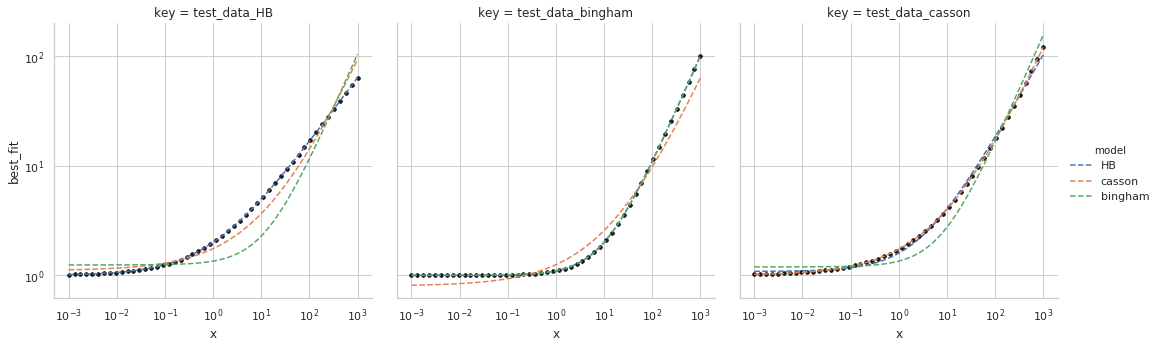

In [86]:
grid = sns.FacetGrid(augmented_table_full, col="key", hue='model', col_wrap=3,height=5)
grid.map(plt.plot, 'x', 'data', marker='o', ls='None', ms=3, color='k').set(yscale = 'log').set(xscale = 'log')
grid.map(plt.plot, 'x', 'best_fit', ls='--').add_legend()

In [90]:
#finally I want to create a table with all my result
HB_table=pb.tidy(res_fit_dict_HB)
casson_table=pb.tidy(res_fit_dict_casson)
bingham_table=pb.tidy(res_fit_dict_bingham)

full_table=pd.concat([HB_table,casson_table,bingham_table])
full_table

,name,value,min,max,vary,expr,stderr,init_value,key
0,HB_K,1.000000,0,inf,True,NaN,1.304959e-16,1.0,test_data_HB
1,HB_n,0.600000,0,1.0,True,NaN,2.829384e-17,0.5,test_data_HB
2,HB_ystress,1.000000,0,inf,True,NaN,6.536236e-17,1.0,test_data_HB
3,HB_K,0.100000,0,inf,True,NaN,7.037382e-16,1.0,test_data_bingham
4,HB_n,1.000000,0,1.0,True,NaN,6.803276e-16,0.5,test_data_bingham
5,HB_ystress,1.000000,0,inf,True,NaN,1.343320e-15,1.0,test_data_bingham
6,HB_K,0.506446,0,inf,True,NaN,2.153864e-02,1.0,test_data_casson
7,HB_n,0.768100,0,1.0,True,NaN,9.126069e-03,0.5,test_data_casson
8,HB_ystress,1.085333,0,inf,True,NaN,1.488802e-02,1.0,test_data_casson
0,casson_eta_bg,0.074314,0,inf,True,NaN,4.212752e-03,0.1,test_data_HB


In [0]:
# and save it to a file
full_table.to_excel('fit_parameter_table.xls')

In [93]:
pd.read_excel('fit_parameter_table.xls')

,Unnamed: 0,name,value,min,max,vary,expr,stderr,init_value,key
0,0,HB_K,1.000000,0,inf,True,NaN,1.304959e-16,1.0,test_data_HB
1,1,HB_n,0.600000,0,1.0,True,NaN,2.829384e-17,0.5,test_data_HB
2,2,HB_ystress,1.000000,0,inf,True,NaN,6.536236e-17,1.0,test_data_HB
3,3,HB_K,0.100000,0,inf,True,NaN,7.037382e-16,1.0,test_data_bingham
4,4,HB_n,1.000000,0,1.0,True,NaN,6.803276e-16,0.5,test_data_bingham
5,5,HB_ystress,1.000000,0,inf,True,NaN,1.343320e-15,1.0,test_data_bingham
6,6,HB_K,0.506446,0,inf,True,NaN,2.153864e-02,1.0,test_data_casson
7,7,HB_n,0.768100,0,1.0,True,NaN,9.126069e-03,0.5,test_data_casson
8,8,HB_ystress,1.085333,0,inf,True,NaN,1.488802e-02,1.0,test_data_casson
9,0,casson_eta_bg,0.074314,0,inf,True,NaN,4.212752e-03,0.1,test_data_HB
